In [ ]:
import numpy as np

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_layer_sizes, output_size, activation_func='sigmoid'):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.num_hidden_layers = len(hidden_layer_sizes)
        self.weights = []
        self.biases = []

        # Initialize weights and biases for hidden layers
        prev_layer_size = input_size
        for layer_size in hidden_layer_sizes:
            self.weights.append(np.random.rand(prev_layer_size, layer_size))
            self.biases.append(np.random.rand(1, layer_size))
            prev_layer_size = layer_size

        # Initialize weights and biases for output layer
        self.weights.append(np.random.rand(prev_layer_size, output_size))
        self.biases.append(np.random.rand(1, output_size))

        # Set the activation function
        if activation_func == 'sigmoid':
            self.activation_func = sigmoid
        elif activation_func == 'relu':
            self.activation_func = relu
        else:
            raise ValueError("Unsupported activation function")

    def forward(self, X):
        layer_output = X
        for i in range(self.num_hidden_layers + 1):
            layer_input = np.dot(layer_output, self.weights[i]) + self.biases[i]
            layer_output = self.activation_func(layer_input)

        self.predicted_output = layer_output
        return self.predicted_output
    
# Define the Particle class for PSO
class Particle:
    def __init__(self, input_size, hidden_size, output_size):
        self.nn = NeuralNetwork(input_size, hidden_size, output_size)
        self.position = self.flatten_params()
        self.velocity = np.random.rand(len(self.position))

    def flatten_params(self):
        return np.concatenate([layer.flatten() for layer in [self.nn.weights_input_hidden,
                                                             self.nn.biases_hidden,
                                                             self.nn.weights_hidden_output,
                                                             self.nn.biases_output]])

    def update_position(self):
        self.position += self.velocity

# Define the PSO class
class PSO:
    def __init__(self, num_particles, input_size, hidden_size, output_size, target_function):
        self.num_particles = num_particles
        self.target_function = target_function
        self.particles = [Particle(input_size, hidden_size, output_size) for _ in range(num_particles)]
        self.global_best_position = None
        self.global_best_value = float('inf')

    def optimize(self, num_iterations):
        for _ in range(num_iterations):
            for particle in self.particles:
                current_value = self.target_function(particle.nn)
                if current_value < self.global_best_value:
                    self.global_best_value = current_value
                    self.global_best_position = particle.position

            for particle in self.particles:
                inertia = 0.5
                cognitive_weight = 1.5
                social_weight = 1.5

                # Update velocity
                particle.velocity = (inertia * particle.velocity +
                                     cognitive_weight * np.random.rand() * (particle.position - self.global_best_position) +
                                     social_weight * np.random.rand() * (particle.position - particle.position))

                # Update position
                particle.update_position()

# Define a simple target function (mean squared error)
def target_function(nn):
    target_output = np.array([[0.8, 0.2]])  # Replace with your target output
    predicted_output = nn.forward(np.array([[0.5, 0.3]]))  # Replace with your input
    return np.mean((target_output - predicted_output) ** 2)

# Example usage with configurable hidden layers
input_size = 2
hidden_layer_sizes = [3, 4]  # Example: Two hidden layers with 3 and 4 neurons
output_size = 2
num_particles = 10
num_iterations = 100

pso = PSO(num_particles, input_size, sum(hidden_layer_sizes), output_size, target_function)
pso.optimize(num_iterations)

# Retrieve the best neural network with configurable hidden layers
best_nn = NeuralNetwork(input_size, hidden_layer_sizes, output_size, activation_func='relu')
best_nn_weights = pso.global_best_position
layer_sizes = [input_size] + hidden_layer_sizes + [output_size]


# Update weights and biases
start = 0
for i in range(len(layer_sizes) - 1):
    end = start + layer_sizes[i] * layer_sizes[i + 1]
    best_nn.weights_input_hidden = np.reshape(best_nn_weights[start:end], (layer_sizes[i], layer_sizes[i + 1]))
    start = end

    end = start + layer_sizes[i + 1]
    best_nn.biases_hidden = np.reshape(best_nn_weights[start:end], (1, layer_sizes[i + 1]))
    start = end

    end = start + layer_sizes[i + 1] * layer_sizes[i + 2]
    best_nn.weights_hidden_output = np.reshape(best_nn_weights[start:end], (layer_sizes[i + 1], layer_sizes[i + 2]))
    start = end

    end = start + layer_sizes[i + 2]
    best_nn.biases_output = np.reshape(best_nn_weights[start:end], (1, layer_sizes[i + 2]))

# Now, best_nn contains the optimized neural network


In [ ]:
import numpy as np

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_layer_sizes, output_size, activation_func='sigmoid'):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.num_hidden_layers = len(hidden_layer_sizes)
        self.weights = []
        self.biases = []

        # Initialize weights and biases for hidden layers
        prev_layer_size = input_size
        for layer_size in hidden_layer_sizes:
            self.weights.append(np.random.rand(prev_layer_size, layer_size))
            self.biases.append(np.random.rand(1, layer_size))
            prev_layer_size = layer_size

        # Initialize weights and biases for output layer
        self.weights.append(np.random.rand(prev_layer_size, output_size))
        self.biases.append(np.random.rand(1, output_size))

        # Set the activation function
        if activation_func == 'sigmoid':
            self.activation_func = sigmoid
        elif activation_func == 'relu':
            self.activation_func = relu
        else:
            raise ValueError("Unsupported activation function")

    def forward(self, X):
        layer_output = X
        for i in range(self.num_hidden_layers + 1):
            layer_input = np.dot(layer_output, self.weights[i]) + self.biases[i]
            layer_output = self.activation_func(layer_input)

        self.predicted_output = layer_output
        return self.predicted_output

# Define the Particle class for PSO
class Particle:
    def __init__(self, input_size, hidden_size, output_size):
        self.nn = NeuralNetwork(input_size, hidden_size, output_size)
        self.position = self.flatten_params()
        self.velocity = np.random.rand(len(self.position))

    def flatten_params(self):
        return np.concatenate([layer.flatten() for layer in [self.nn.weights_input_hidden,
                                                             self.nn.biases_hidden,
                                                             self.nn.weights_hidden_output,
                                                             self.nn.biases_output]])

    def update_position(self):
        self.position += self.velocity

# Define the PSO class
class PSO:
    def __init__(self, num_particles, input_size, hidden_size, output_size, target_function):
        self.num_particles = num_particles
        self.target_function = target_function
        self.particles = [Particle(input_size, hidden_size, output_size) for _ in range(num_particles)]
        self.global_best_position = None
        self.global_best_value = float('inf')

    def optimize(self, num_iterations):
        for _ in range(num_iterations):
            for particle in self.particles:
                current_value = self.target_function(particle.nn)
                if current_value < self.global_best_value:
                    self.global_best_value = current_value
                    self.global_best_position = particle.position

            for particle in self.particles:
                inertia = 0.5
                cognitive_weight = 1.5
                social_weight = 1.5

                # Update velocity
                particle.velocity = (inertia * particle.velocity +
                                     cognitive_weight * np.random.rand() * (particle.position - self.global_best_position) +
                                     social_weight * np.random.rand() * (particle.position - particle.position))

                # Update position
                particle.update_position()

# Define a simple target function (mean squared error)
def target_function(nn):
    target_output = np.array([[0.8, 0.2]])  # Replace with your target output
    predicted_output = nn.forward(np.array([[0.5, 0.3]]))  # Replace with your input
    return np.mean((target_output - predicted_output) ** 2)

# Example usage with configurable hidden layers
input_size = 2
hidden_layer_sizes = [3, 4]  # Example: Two hidden layers with 3 and 4 neurons
output_size = 2
num_particles = 10
num_iterations = 100

# Calculate the total number of neurons in hidden layers
total_hidden_neurons = sum(hidden_layer_sizes)

# Initialize PSO with the correct number of input, hidden, and output neurons
pso = PSO(num_particles, input_size, total_hidden_neurons, output_size, target_function)
pso.optimize(num_iterations)

# Retrieve the best neural network with configurable hidden layers
best_nn = NeuralNetwork(input_size, hidden_layer_sizes, output_size, activation_func='relu')
best_nn_weights = pso.global_best_position
layer_sizes = [input_size] + hidden_layer_sizes + [output_size]

# Update weights and biases
start = 0
for i in range(len(layer_sizes) - 1):
    end = start + layer_sizes[i] * layer_sizes[i + 1]
    best_nn.weights[i] = np.reshape(best_nn_weights[start:end], (layer_sizes[i], layer_sizes[i + 1]))
    start = end

    end = start + layer_sizes[i + 1]
    best_nn.biases[i] = np.reshape(best_nn_weights[start:end], (1, layer_sizes[i + 1]))
    start = end

# Now, best_nn contains the optimized neural network with configurable hidden layers

In [ ]:
import numpy as np

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.biases_hidden = np.random.rand(1, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.biases_output = np.random.rand(1, output_size)

    def forward(self, X):
        # Forward pass through the network
        self.hidden_output = np.dot(X, self.weights_input_hidden) + self.biases_hidden
        self.hidden_activation = sigmoid(self.hidden_output)
        self.final_output = np.dot(self.hidden_activation, self.weights_hidden_output) + self.biases_output
        return sigmoid(self.final_output)

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the PSO algorithm
def particle_swarm_optimization(objective_function, num_particles, num_dimensions, max_iter):
    # Initialize particles' positions and velocities
    particles_position = np.random.rand(num_particles, num_dimensions)
    particles_velocity = np.random.rand(num_particles, num_dimensions)

    # Initialize personal best positions and fitness values
    personal_best_positions = particles_position.copy()
    personal_best_fitness = np.full(num_particles, np.inf)

    # Initialize global best position and fitness value
    global_best_position = np.zeros(num_dimensions)
    global_best_fitness = np.inf

    for iteration in range(max_iter):
        for i in range(num_particles):
            # Evaluate fitness
            fitness = objective_function(particles_position[i])

            # Update personal best
            if fitness < personal_best_fitness[i]:
                personal_best_fitness[i] = fitness
                personal_best_positions[i] = particles_position[i]

            # Update global best
            if fitness < global_best_fitness:
                global_best_fitness = fitness
                global_best_position = particles_position[i]

            # Update velocity and position
            inertia_weight = 0.5
            cognitive_weight = 2.0
            social_weight = 2.0

            r1, r2 = np.random.rand(), np.random.rand()
            cognitive_component = cognitive_weight * r1 * (personal_best_positions[i] - particles_position[i])
            social_component = social_weight * r2 * (global_best_position - particles_position[i])

            particles_velocity[i] = inertia_weight * particles_velocity[i] + cognitive_component + social_component
            particles_position[i] = particles_position[i] + particles_velocity[i]

    return global_best_position

# Define the objective function to minimize (mean squared error)
def objective_function(weights):
    # Reshape weights for the neural network
    num_weights_input_hidden = input_size * hidden_size
    num_weights_hidden_output = hidden_size * output_size

    weights_input_hidden = np.reshape(weights[:num_weights_input_hidden], (input_size, hidden_size))
    biases_hidden = np.reshape(weights[num_weights_input_hidden:num_weights_input_hidden + hidden_size],
                                (1, hidden_size))
    weights_hidden_output = np.reshape(weights[num_weights_input_hidden + hidden_size:num_weights_input_hidden + hidden_size + num_weights_hidden_output],
                                       (hidden_size, output_size))
    biases_output = np.reshape(weights[num_weights_input_hidden + hidden_size + num_weights_hidden_output:],
                                (1, output_size))

    # Set the weights and biases in the neural network
    neural_network.weights_input_hidden = weights_input_hidden
    neural_network.biases_hidden = biases_hidden
    neural_network.weights_hidden_output = weights_hidden_output
    neural_network.biases_output = biases_output

    # Forward pass through the neural network
    predictions = neural_network.forward(X_train)

    # Calculate mean squared error
    error = np.mean((predictions - y_train) ** 2)

    return error

# Set the input, hidden, and output sizes
input_size = 2
hidden_size = 3
output_size = 1

# Create an instance of the neural network
neural_network = NeuralNetwork(input_size, hidden_size, output_size)

# Generate random training data
np.random.seed(42)
X_train = np.random.rand(100, input_size)
y_train = np.random.rand(100, output_size)

# Set PSO parameters
num_particles = 10
num_dimensions = (input_size * hidden_size) + hidden_size + (hidden_size * output_size) + output_size
max_iter = 50

# Run PSO to optimize neural network weights
best_weights = particle_swarm_optimization(objective_function, num_particles, num_dimensions, max_iter)

# Reshape and set the best weights in the neural network
best_weights_input_hidden = np.reshape(best_weights[:num_weights_input_hidden], (input_size, hidden_size))
best_biases_hidden = np.reshape(best_weights[num_weights_input_hidden:num_weights_input_hidden + hidden_size],
                                (1, hidden_size))
best_weights_hidden_output = np.reshape(best_weights[num_weights_input_hidden + hidden_size:],
                                       (hidden_size, output_size))

neural_network.weights_input_hidden = best_weights_input_hidden
neural_network.biases_hidden = best_biases_hidden
neural_network.weights_hidden_output = best_weights_hidden_output

# Test the optimized neural network
X_test = np.random.rand(10, input_size)
predictions = neural_network.forward(X_test)

print("Optimized Neural Network Predictions:")
print(predictions)


In [ ]:
import numpy as np

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.biases_hidden = np.random.rand(1, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.biases_output = np.random.rand(1, output_size)

    def forward(self, X):
        # Forward pass through the network
        self.hidden_output = np.dot(X, self.weights_input_hidden) + self.biases_hidden
        self.hidden_activation = sigmoid(self.hidden_output)
        self.final_output = np.dot(self.hidden_activation, self.weights_hidden_output) + self.biases_output
        return sigmoid(self.final_output)

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the PSO algorithm
def particle_swarm_optimization(objective_function, num_particles, num_dimensions, max_iter):
    # Initialize particles' positions and velocities
    particles_position = np.random.rand(num_particles, num_dimensions)
    particles_velocity = np.random.rand(num_particles, num_dimensions)

    # Initialize personal best positions and fitness values
    personal_best_positions = particles_position.copy()
    personal_best_fitness = np.full(num_particles, np.inf)

    # Initialize global best position and fitness value
    global_best_position = np.zeros(num_dimensions)
    global_best_fitness = np.inf

    for iteration in range(max_iter):
        for i in range(num_particles):
            # Evaluate fitness
            fitness = objective_function(particles_position[i])

            # Update personal best
            if fitness < personal_best_fitness[i]:
                personal_best_fitness[i] = fitness
                personal_best_positions[i] = particles_position[i]

            # Update global best
            if fitness < global_best_fitness:
                global_best_fitness = fitness
                global_best_position = particles_position[i]

            # Update velocity and position
            inertia_weight = 0.5
            cognitive_weight = 2.0
            social_weight = 2.0

            r1, r2 = np.random.rand(), np.random.rand()
            cognitive_component = cognitive_weight * r1 * (personal_best_positions[i] - particles_position[i])
            social_component = social_weight * r2 * (global_best_position - particles_position[i])

            particles_velocity[i] = inertia_weight * particles_velocity[i] + cognitive_component + social_component
            particles_position[i] = particles_position[i] + particles_velocity[i]

    return global_best_position

# Define the objective function to minimize (mean squared error)
def objective_function(weights):
    global input_size, hidden_size, output_size, X_train, y_train

    # Reshape weights for the neural network
    num_weights_input_hidden = input_size * hidden_size
    num_biases_hidden = hidden_size
    num_weights_hidden_output = hidden_size * output_size
    num_biases_output = output_size

    weights_input_hidden = np.reshape(weights[:num_weights_input_hidden], (input_size, hidden_size))
    biases_hidden = np.reshape(weights[num_weights_input_hidden:num_weights_input_hidden + num_biases_hidden],
                                (1, hidden_size))
    weights_hidden_output = np.reshape(weights[num_weights_input_hidden + num_biases_hidden:num_weights_input_hidden + num_biases_hidden + num_weights_hidden_output],
                                       (hidden_size, output_size))
    biases_output = np.reshape(weights[num_weights_input_hidden + num_biases_hidden + num_weights_hidden_output:],
                                (1, output_size))

    # Set the weights and biases in the neural network
    neural_network.weights_input_hidden = weights_input_hidden
    neural_network.biases_hidden = biases_hidden
    neural_network.weights_hidden_output = weights_hidden_output
    neural_network.biases_output = biases_output

    # Forward pass through the neural network
    predictions = neural_network.forward(X_train)

    # Calculate mean squared error
    error = np.mean((predictions - y_train) ** 2)

    return error

# Set the input, hidden, and output sizes
input_size = 2
hidden_size = 3
output_size = 1

# Create an instance of the neural network
neural_network = NeuralNetwork(input_size, hidden_size, output_size)

# Generate random training data
np.random.seed(42)
X_train = np.random.rand(100, input_size)
y_train = np.random.rand(100, output_size)

# Set PSO parameters
num_particles = 10
num_dimensions = (input_size * hidden_size) + hidden_size + (hidden_size * output_size) + output_size
max_iter = 50

# Run PSO to optimize neural network weights
best_weights = particle_swarm_optimization(objective_function, num_particles, num_dimensions, max_iter)

# Reshape and set the best weights in the neural network
num_weights_input_hidden = input_size * hidden_size
best_weights_input_hidden = np.reshape(best_weights[:num_weights_input_hidden], (input_size, hidden_size))
best_biases_hidden = np.reshape(best_weights[num_weights_input_hidden:num_weights_input_hidden + hidden_size],
                                (1, hidden_size))
best_weights_hidden_output = np.reshape(best_weights[num_weights_input_hidden + hidden_size:],
                                       (hidden_size, output_size))

neural_network.weights_input_hidden = best_weights_input_hidden
neural_network.biases_hidden = best_biases_hidden
neural_network.weights_hidden_output = best_weights_hidden_output

# Test the optimized neural network
X_test = np.random.rand(10, input_size)
predictions = neural_network.forward(X_test)

print("Optimized Neural Network Predictions:")
print(predictions)


In [ ]:
import numpy as np

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.biases_hidden = np.random.rand(1, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.biases_output = np.random.rand(1, output_size)

    def forward(self, X):
        # Forward pass through the network
        self.hidden_output = np.dot(X, self.weights_input_hidden) + self.biases_hidden
        self.hidden_activation = sigmoid(self.hidden_output)
        self.final_output = np.dot(self.hidden_activation, self.weights_hidden_output) + self.biases_output
        return sigmoid(self.final_output)

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the PSO algorithm
def particle_swarm_optimization(objective_function, num_particles, num_dimensions, max_iter):
    # Initialize particles' positions and velocities
    particles_position = np.random.rand(num_particles, num_dimensions)
    particles_velocity = np.random.rand(num_particles, num_dimensions)

    # Initialize personal best positions and fitness values
    personal_best_positions = particles_position.copy()
    personal_best_fitness = np.full(num_particles, np.inf)

    # Initialize global best position and fitness value
    global_best_position = np.zeros(num_dimensions)
    global_best_fitness = np.inf

    for iteration in range(max_iter):
        for i in range(num_particles):
            # Evaluate fitness
            fitness = objective_function(particles_position[i])

            # Update personal best
            if fitness < personal_best_fitness[i]:
                personal_best_fitness[i] = fitness
                personal_best_positions[i] = particles_position[i]

            # Update global best
            if fitness < global_best_fitness:
                global_best_fitness = fitness
                global_best_position = particles_position[i]

            # Update velocity and position
            inertia_weight = 0.5
            cognitive_weight = 2.0
            social_weight = 2.0

            r1, r2 = np.random.rand(), np.random.rand()
            cognitive_component = cognitive_weight * r1 * (personal_best_positions[i] - particles_position[i])
            social_component = social_weight * r2 * (global_best_position - particles_position[i])

            particles_velocity[i] = inertia_weight * particles_velocity[i] + cognitive_component + social_component
            particles_position[i] = particles_position[i] + particles_velocity[i]

    return global_best_position

# Define the objective function to minimize (mean squared error)
def objective_function(weights):
    global input_size, hidden_size, output_size, X_train, y_train

    # Reshape weights for the neural network
    num_weights_input_hidden = input_size * hidden_size
    num_biases_hidden = hidden_size
    num_weights_hidden_output = hidden_size * output_size
    num_biases_output = output_size

    weights_input_hidden = np.reshape(weights[:num_weights_input_hidden], (input_size, hidden_size))
    biases_hidden = np.reshape(weights[num_weights_input_hidden:num_weights_input_hidden + num_biases_hidden],
                                (1, hidden_size))
    weights_hidden_output = np.reshape(weights[num_weights_input_hidden + num_biases_hidden:num_weights_input_hidden + num_biases_hidden + num_weights_hidden_output],
                                       (hidden_size, output_size))
    biases_output = np.reshape(weights[num_weights_input_hidden + num_biases_hidden + num_weights_hidden_output:],
                                (1, output_size))

    # Set the weights and biases in the neural network
    neural_network.weights_input_hidden = weights_input_hidden
    neural_network.biases_hidden = biases_hidden
    neural_network.weights_hidden_output = weights_hidden_output
    neural_network.biases_output = biases_output

    # Forward pass through the neural network
    predictions = neural_network.forward(X_train)

    # Calculate mean squared error
    error = np.mean((predictions - y_train) ** 2)

    return error

# Set the input, hidden, and output sizes
input_size = 2
hidden_size = 3
output_size = 1

# Create an instance of the neural network
neural_network = NeuralNetwork(input_size, hidden_size, output_size)

# Generate random training data
np.random.seed(42)
X_train = np.random.rand(100, input_size)
y_train = np.random.rand(100, output_size)

# Set PSO parameters
num_particles = 10
num_dimensions = (input_size * hidden_size) + hidden_size + (hidden_size * output_size) + output_size
max_iter = 50

# Run PSO to optimize neural network weights
best_weights = particle_swarm_optimization(objective_function, num_particles, num_dimensions, max_iter)

# Reshape and set the best weights in the neural network
num_weights_input_hidden = input_size * hidden_size
num_biases_hidden = hidden_size
best_weights_input_hidden = np.reshape(best_weights[:num_weights_input_hidden], (input_size, hidden_size))
best_biases_hidden = np.reshape(best_weights[num_weights_input_hidden:num_weights_input_hidden + num_biases_hidden],
                                (1, hidden_size))
best_weights_hidden_output = np.reshape(best_weights[num_weights_input_hidden + num_biases_hidden:],
                                       (hidden_size, output_size))

neural_network.weights_input_hidden = best_weights_input_hidden
neural_network.biases_hidden = best_biases_hidden
neural_network.weights_hidden_output = best_weights_hidden_output

# Test the optimized neural network
X_test = np.random.rand(10, input_size)
predictions = neural_network.forward(X_test)

print("Optimized Neural Network Predictions:")
print(predictions)


In [ ]:
import numpy as np

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.biases_hidden = np.random.rand(1, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.biases_output = np.random.rand(1, output_size)

    def forward(self, X):
        # Forward pass through the network
        self.hidden_output = np.dot(X, self.weights_input_hidden) + self.biases_hidden
        self.hidden_activation = sigmoid(self.hidden_output)
        self.final_output = np.dot(self.hidden_activation, self.weights_hidden_output) + self.biases_output
        return sigmoid(self.final_output)

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the PSO algorithm
def particle_swarm_optimization(objective_function, num_particles, num_dimensions, max_iter):
    # Initialize particles' positions and velocities
    particles_position = np.random.rand(num_particles, num_dimensions)
    particles_velocity = np.random.rand(num_particles, num_dimensions)

    # Initialize personal best positions and fitness values
    personal_best_positions = particles_position.copy()
    personal_best_fitness = np.full(num_particles, np.inf)

    # Initialize global best position and fitness value
    global_best_position = np.zeros(num_dimensions)
    global_best_fitness = np.inf

    for iteration in range(max_iter):
        for i in range(num_particles):
            # Evaluate fitness
            fitness = objective_function(particles_position[i])

            # Update personal best
            if fitness < personal_best_fitness[i]:
                personal_best_fitness[i] = fitness
                personal_best_positions[i] = particles_position[i]

            # Update global best
            if fitness < global_best_fitness:
                global_best_fitness = fitness
                global_best_position = particles_position[i]

            # Update velocity and position
            inertia_weight = 0.5
            cognitive_weight = 2.0
            social_weight = 2.0

            r1, r2 = np.random.rand(), np.random.rand()
            cognitive_component = cognitive_weight * r1 * (personal_best_positions[i] - particles_position[i])
            social_component = social_weight * r2 * (global_best_position - particles_position[i])

            particles_velocity[i] = inertia_weight * particles_velocity[i] + cognitive_component + social_component
            particles_position[i] = particles_position[i] + particles_velocity[i]

    return global_best_position

# Define the objective function to minimize (mean squared error)
def objective_function(weights):
    global input_size, hidden_size, output_size, X_train, y_train

    # Reshape weights for the neural network
    num_weights_input_hidden = input_size * hidden_size
    num_biases_hidden = hidden_size
    num_weights_hidden_output = hidden_size * output_size
    num_biases_output = output_size

    weights_input_hidden = np.reshape(weights[:num_weights_input_hidden], (input_size, hidden_size))
    biases_hidden = np.reshape(weights[num_weights_input_hidden:num_weights_input_hidden + num_biases_hidden],
                                (1, hidden_size))
    weights_hidden_output = np.reshape(weights[num_weights_input_hidden + num_biases_hidden:num_weights_input_hidden + num_biases_hidden + num_weights_hidden_output],
                                       (hidden_size, output_size))
    biases_output = np.reshape(weights[num_weights_input_hidden + num_biases_hidden + num_weights_hidden_output:],
                                (1, output_size))

    # Set the weights and biases in the neural network
    neural_network.weights_input_hidden = weights_input_hidden
    neural_network.biases_hidden = biases_hidden
    neural_network.weights_hidden_output = weights_hidden_output
    neural_network.biases_output = biases_output

    # Forward pass through the neural network
    predictions = neural_network.forward(X_train)

    # Calculate mean squared error
    error = np.mean((predictions - y_train) ** 2)

    return error

# Set the input, hidden, and output sizes
input_size = 2
hidden_size = 3
output_size = 1

# Create an instance of the neural network
neural_network = NeuralNetwork(input_size, hidden_size, output_size)

# Generate random training data
np.random.seed(42)
X_train = np.random.rand(100, input_size)
y_train = np.random.rand(100, output_size)

# Set PSO parameters
num_particles = 10
num_dimensions = (input_size * hidden_size) + hidden_size + (hidden_size * output_size) + output_size
max_iter = 50

# Run PSO to optimize neural network weights
best_weights = particle_swarm_optimization(objective_function, num_particles, num_dimensions, max_iter)

# Reshape and set the best weights in the neural network
num_weights_input_hidden = input_size * hidden_size
num_biases_hidden = hidden_size
best_weights_input_hidden = np.reshape(best_weights[:num_weights_input_hidden], (input_size, hidden_size))
best_biases_hidden = np.reshape(best_weights[num_weights_input_hidden:num_weights_input_hidden + num_biases_hidden],
                                (1, hidden_size))
num_weights_hidden_output = hidden_size * output_size
best_weights_hidden_output = np.reshape(best_weights[num_weights_input_hidden + num_biases_hidden:num_weights_input_hidden + num_biases_hidden + num_weights_hidden_output],
                                       (hidden_size, output_size))
best_biases_output = np.reshape(best_weights[num_weights_input_hidden + num_biases_hidden + num_weights_hidden_output:],
                                (1, output_size))

neural_network.weights_input_hidden = best_weights_input_hidden
neural_network.biases_hidden = best_biases_hidden
neural_network.weights_hidden_output = best_weights_hidden_output
neural_network.biases_output = best_biases_output

# Test the optimized neural network
X_test = np.random.rand(10, input_size)
predictions = neural_network.forward(X_test)

print("Optimized Neural Network Predictions:")
print(predictions)


In [ ]:
import numpy as np

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation_hidden=sigmoid, activation_output=sigmoid):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.biases_hidden = np.random.rand(1, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.biases_output = np.random.rand(1, output_size)

        # Set activation functions
        self.activation_hidden = activation_hidden
        self.activation_output = activation_output

    def forward(self, X):
        # Forward pass through the network
        self.hidden_output = np.dot(X, self.weights_input_hidden) + self.biases_hidden
        self.hidden_activation = self.activation_hidden(self.hidden_output)
        self.final_output = np.dot(self.hidden_activation, self.weights_hidden_output) + self.biases_output
        return self.activation_output(self.final_output)

# Define the PSO algorithm
def particle_swarm_optimization(objective_function, num_particles, num_dimensions, max_iter):
    # Initialize particles' positions and velocities
    particles_position = np.random.rand(num_particles, num_dimensions)
    particles_velocity = np.random.rand(num_particles, num_dimensions)

    # Initialize personal best positions and fitness values
    personal_best_positions = particles_position.copy()
    personal_best_fitness = np.full(num_particles, np.inf)

    # Initialize global best position and fitness value
    global_best_position = np.zeros(num_dimensions)
    global_best_fitness = np.inf

    for iteration in range(max_iter):
        for i in range(num_particles):
            # Evaluate fitness
            fitness = objective_function(particles_position[i])

            # Update personal best
            if fitness < personal_best_fitness[i]:
                personal_best_fitness[i] = fitness
                personal_best_positions[i] = particles_position[i]

            # Update global best
            if fitness < global_best_fitness:
                global_best_fitness = fitness
                global_best_position = particles_position[i]

            # Update velocity and position
            inertia_weight = 0.5
            cognitive_weight = 2.0
            social_weight = 2.0

            r1, r2 = np.random.rand(), np.random.rand()
            cognitive_component = cognitive_weight * r1 * (personal_best_positions[i] - particles_position[i])
            social_component = social_weight * r2 * (global_best_position - particles_position[i])

            particles_velocity[i] = inertia_weight * particles_velocity[i] + cognitive_component + social_component
            particles_position[i] = particles_position[i] + particles_velocity[i]

    return global_best_position

# Define the objective function to minimize (mean squared error)
def objective_function(weights):
    global input_size, hidden_size, output_size, X_train, y_train

    # Reshape weights for the neural network
    num_weights_input_hidden = input_size * hidden_size
    num_biases_hidden = hidden_size
    num_weights_hidden_output = hidden_size * output_size
    num_biases_output = output_size

    weights_input_hidden = np.reshape(weights[:num_weights_input_hidden], (input_size, hidden_size))
    biases_hidden = np.reshape(weights[num_weights_input_hidden:num_weights_input_hidden + num_biases_hidden],
                                (1, hidden_size))
    weights_hidden_output = np.reshape(weights[num_weights_input_hidden + num_biases_hidden:num_weights_input_hidden + num_biases_hidden + num_weights_hidden_output],
                                       (hidden_size, output_size))
    biases_output = np.reshape(weights[num_weights_input_hidden + num_biases_hidden + num_weights_hidden_output:],
                                (1, output_size))

    # Set the weights and biases in the neural network
    neural_network.weights_input_hidden = weights_input_hidden
    neural_network.biases_hidden = biases_hidden
    neural_network.weights_hidden_output = weights_hidden_output
    neural_network.biases_output = biases_output

    # Forward pass through the neural network
    predictions = neural_network.forward(X_train)

    # Calculate mean squared error
    error = np.mean((predictions - y_train) ** 2)

    return error

# Set the input, hidden, and output sizes
input_size = 2
hidden_size = 3
output_size = 1

# Create an instance of the neural network with ReLU activation for hidden layer
neural_network = NeuralNetwork(input_size, hidden_size, output_size, activation_hidden=relu)

# Generate random training data
np.random.seed(42)
X_train = np.random.rand(100, input_size)
y_train = np.random.rand(100, output_size)

# Set PSO parameters
num_particles = 10
num_dimensions = (input_size * hidden_size) + hidden_size + (hidden_size * output_size) + output_size
max_iter = 50

# Run PSO to optimize neural network weights
best_weights = particle_swarm_optimization(objective_function, num_particles, num_dimensions, max_iter)

# Reshape and set the best weights in the neural network
num_weights_input_hidden = input_size * hidden_size
num_biases_hidden = hidden_size
best_weights_input_hidden = np.reshape(best_weights[:num_weights_input_hidden], (input_size, hidden_size))
best_biases_hidden = np.reshape(best_weights[num_weights_input_hidden:num_weights_input_hidden + num_biases_hidden],
                                (1, hidden_size))
num_weights_hidden_output = hidden_size * output_size
best_weights_hidden_output = np.reshape(best_weights[num_weights_input_hidden + num_biases_hidden:num_weights_input_hidden + num_biases_hidden + num_weights_hidden_output],
                                       (hidden_size, output_size))
best_biases_output = np.reshape(best_weights[num_weights_input_hidden + num_biases_hidden + num_weights_hidden_output:],
                                (1, output_size))

neural_network.weights_input_hidden = best_weights_input_hidden
neural_network.biases_hidden = best_biases_hidden
neural_network.weights_hidden_output = best_weights_hidden_output
neural_network.biases_output = best_biases_output

# Test the optimized neural network
X_test = np.random.rand(10, input_size)
predictions = neural_network.forward(X_test)

print("Optimized Neural Network Predictions:")
print(predictions)


In [ ]:
import numpy as np

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_layer_sizes, output_size, activation_hidden=sigmoid, activation_output=sigmoid):
        self.input_size = input_size
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden, self.biases_hidden = self.initialize_hidden_layers()
        self.weights_hidden_output = np.random.rand(self.hidden_layer_sizes[-1], output_size)
        self.biases_output = np.random.rand(1, output_size)

        # Set activation functions
        self.activation_hidden = activation_hidden
        self.activation_output = activation_output

    def initialize_hidden_layers(self):
        num_hidden_layers = len(self.hidden_layer_sizes)
        weights_input_hidden = []
        biases_hidden = []

        # Initialize weights and biases for each hidden layer
        for i in range(num_hidden_layers):
            if i == 0:
                weights = np.random.rand(self.input_size, self.hidden_layer_sizes[i])
                biases = np.random.rand(1, self.hidden_layer_sizes[i])
            else:
                weights = np.random.rand(self.hidden_layer_sizes[i-1], self.hidden_layer_sizes[i])
                biases = np.random.rand(1, self.hidden_layer_sizes[i])

            weights_input_hidden.append(weights)
            biases_hidden.append(biases)

        return weights_input_hidden, biases_hidden

    def forward(self, X):
        # Forward pass through the network
        hidden_output = X

        for i in range(len(self.hidden_layer_sizes)):
            hidden_output = np.dot(hidden_output, self.weights_input_hidden[i]) + self.biases_hidden[i]
            hidden_output = self.activation_hidden(hidden_output)

        final_output = np.dot(hidden_output, self.weights_hidden_output) + self.biases_output
        return self.activation_output(final_output)

# Define the PSO algorithm
def particle_swarm_optimization(objective_function, num_particles, num_dimensions, max_iter):
    # Initialize particles' positions and velocities
    particles_position = np.random.rand(num_particles, num_dimensions)
    particles_velocity = np.random.rand(num_particles, num_dimensions)

    # Initialize personal best positions and fitness values
    personal_best_positions = particles_position.copy()
    personal_best_fitness = np.full(num_particles, np.inf)

    # Initialize global best position and fitness value
    global_best_position = np.zeros(num_dimensions)
    global_best_fitness = np.inf

    for iteration in range(max_iter):
        for i in range(num_particles):
            # Evaluate fitness
            fitness = objective_function(particles_position[i])

            # Update personal best
            if fitness < personal_best_fitness[i]:
                personal_best_fitness[i] = fitness
                personal_best_positions[i] = particles_position[i]

            # Update global best
            if fitness < global_best_fitness:
                global_best_fitness = fitness
                global_best_position = particles_position[i]

            # Update velocity and position
            inertia_weight = 0.5
            cognitive_weight = 2.0
            social_weight = 2.0

            r1, r2 = np.random.rand(), np.random.rand()
            cognitive_component = cognitive_weight * r1 * (personal_best_positions[i] - particles_position[i])
            social_component = social_weight * r2 * (global_best_position - particles_position[i])

            particles_velocity[i] = inertia_weight * particles_velocity[i] + cognitive_component + social_component
            particles_position[i] = particles_position[i] + particles_velocity[i]

    return global_best_position

# Define the objective function to minimize (mean squared error)
def objective_function(weights):
    global input_size, hidden_layer_sizes, output_size, X_train, y_train

    # Reshape weights for the neural network
    num_weights_input_hidden = 0
    num_biases_hidden = 0
    num_weights_hidden_output = hidden_layer_sizes[-1] * output_size
    num_biases_output = output_size

    weights_input_hidden = []
    biases_hidden = []

    start_idx = 0
    for i in range(len(hidden_layer_sizes)):
        num_weights_input_hidden += (input_size if i == 0 else hidden_layer_sizes[i-1]) * hidden_layer_sizes[i]
        num_biases_hidden += hidden_layer_sizes[i]

        weights_input_hidden.append(
            np.reshape(weights[start_idx:start_idx + num_weights_input_hidden], ((input_size if i == 0 else hidden_layer_sizes[i-1]), hidden_layer_sizes[i])))
        start_idx += num_weights_input_hidden

        biases_hidden.append(np.reshape(weights[start_idx:start_idx + num_biases_hidden], (1, hidden_layer_sizes[i])))
        start_idx += num_biases_hidden

    weights_hidden_output = np.reshape(weights[start_idx:start_idx + num_weights_hidden_output],
                                    (hidden_layer_sizes[-1], output_size))
    biases_output = np.reshape(weights[start_idx:start_idx + num_biases_output],
                                (1, output_size))

    # Set the weights and biases in the neural network
    neural_network.weights_input_hidden = weights_input_hidden
    neural_network.biases_hidden = biases_hidden
    neural_network.weights_hidden_output = weights_hidden_output
    neural_network.biases_output = biases_output

    # Forward pass through the neural network
    predictions = neural_network.forward(X_train)

    # Calculate mean squared error
    error = np.mean((predictions - y_train) ** 2)

    return error


# Set the input, hidden, and output sizes
input_size = 2
hidden_layer_sizes = [3, 4]  # Example: Two hidden layers with 3 and 4 neurons, respectively
output_size = 1

# Create an instance of the neural network with ReLU activation for hidden layer
neural_network = NeuralNetwork(input_size, hidden_layer_sizes, output_size, activation_hidden=relu)

# Generate random training data
np.random.seed(42)
X_train = np.random.rand(100, input_size)
y_train = np.random.rand(100, output_size)

# Set PSO parameters
num_particles = 10
num_dimensions = sum([input_size * hidden_layer_sizes[i] for i in range(len(hidden_layer_sizes))]) + \
                 sum(hidden_layer_sizes) + (hidden_layer_sizes[-1] * output_size) + output_size
max_iter = 50

# Run PSO to optimize neural network weights
best_weights = particle_swarm_optimization(objective_function, num_particles, num_dimensions, max_iter)

# Reshape and set the best weights in the neural network
start_idx = 0
for i in range(len(hidden_layer_sizes)):
    end_idx = start_idx + input_size * hidden_layer_sizes[i]
    neural_network.weights_input_hidden[i] = np.reshape(best_weights[start_idx:end_idx], (input_size, hidden_layer_sizes[i]))
    start_idx = end_idx

start_idx = 0
for i in range(len(hidden_layer_sizes)):
    end_idx = start_idx + hidden_layer_sizes[i]
    neural_network.biases_hidden[i] = np.reshape(best_weights[start_idx:end_idx], (1, hidden_layer_sizes[i]))
    start_idx = end_idx

neural_network.weights_hidden_output = np.reshape(best_weights[start_idx:start_idx + (hidden_layer_sizes[-1] * output_size)],
                                                  (hidden_layer_sizes[-1], output_size))
neural_network.biases_output = np.reshape(best_weights[start_idx + (hidden_layer_sizes[-1] * output_size):],
                                          (1, output_size))

# Test the optimized neural network
X_test = np.random.rand(10, input_size)
predictions = neural_network.forward(X_test)

print("Optimized Neural Network Predictions:")
print(predictions)


In [ ]:
import numpy as np

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_layers, output_size, activations_hidden=None, activation_output=sigmoid):
        # Initialize weights and biases
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.output_size = output_size

        # Initialize activations for hidden layers
        self.activations_hidden = activations_hidden if activations_hidden else [sigmoid] * len(hidden_layers)

        # Initialize weights and biases for hidden layers
        self.weights_hidden = [np.random.rand(prev_layer, curr_layer) for prev_layer, curr_layer in zip([input_size] + hidden_layers[:-1], hidden_layers)]
        self.biases_hidden = [np.random.rand(1, curr_layer) for curr_layer in hidden_layers]

        # Initialize weights and biases for the output layer
        self.weights_output = np.random.rand(hidden_layers[-1], output_size)
        self.biases_output = np.random.rand(1, output_size)

        # Set activation functions
        self.activation_hidden = activations_hidden if activations_hidden else [sigmoid] * len(hidden_layers)
        self.activation_output = activation_output

    def forward(self, X):
        # Forward pass through the network
        hidden_activations = [X]

        # Calculate hidden layer activations
        for i in range(len(self.hidden_layers)):
            hidden_output = np.dot(hidden_activations[-1], self.weights_hidden[i]) + self.biases_hidden[i]
            hidden_activation = self.activations_hidden[i](hidden_output)
            hidden_activations.append(hidden_activation)

        # Calculate final output
        final_output = np.dot(hidden_activations[-1], self.weights_output) + self.biases_output
        return self.activation_output(final_output)

# Define the PSO algorithm
def particle_swarm_optimization(objective_function, num_particles, num_dimensions, max_iter):
    # Initialize particles' positions and velocities
    particles_position = np.random.rand(num_particles, num_dimensions)
    particles_velocity = np.random.rand(num_particles, num_dimensions)

    # Initialize personal best positions and fitness values
    personal_best_positions = particles_position.copy()
    personal_best_fitness = np.full(num_particles, np.inf)

    # Initialize global best position and fitness value
    global_best_position = np.zeros(num_dimensions)
    global_best_fitness = np.inf

    for iteration in range(max_iter):
        for i in range(num_particles):
            # Evaluate fitness
            fitness = objective_function(particles_position[i])

            # Update personal best
            if fitness < personal_best_fitness[i]:
                personal_best_fitness[i] = fitness
                personal_best_positions[i] = particles_position[i]

            # Update global best
            if fitness < global_best_fitness:
                global_best_fitness = fitness
                global_best_position = particles_position[i]

            # Update velocity and position
            inertia_weight = 0.5
            cognitive_weight = 2.0
            social_weight = 2.0

            r1, r2 = np.random.rand(), np.random.rand()
            cognitive_component = cognitive_weight * r1 * (personal_best_positions[i] - particles_position[i])
            social_component = social_weight * r2 * (global_best_position - particles_position[i])

            particles_velocity[i] = inertia_weight * particles_velocity[i] + cognitive_component + social_component
            particles_position[i] = particles_position[i] + particles_velocity[i]

    return global_best_position

# Define the objective function to minimize (mean squared error)
def objective_function(weights):
    global X_train, y_train, neural_network

    # Reshape weights for the neural network
    num_weights_hidden = sum([prev_layer * curr_layer for prev_layer, curr_layer in zip([neural_network.input_size] + neural_network.hidden_layers[:-1], neural_network.hidden_layers)])
    num_weights_output = neural_network.hidden_layers[-1] * neural_network.output_size
    num_biases_hidden = sum(neural_network.hidden_layers)
    #num_biases_output = neural_network.output_size
    #num_biases_output = sum(neural_network.hidden_layers) + neural_network.output_size
    num_biases_output = neural_network.hidden_layers[-1]  # Number of biases in the output layer



    weight_start = 0
    bias_start = num_weights_hidden

    weights_hidden = [np.reshape(weights[weight_start:weight_start + prev_layer * curr_layer], (prev_layer, curr_layer)) for prev_layer, curr_layer in zip([neural_network.input_size] + neural_network.hidden_layers[:-1], neural_network.hidden_layers)]
    weight_start += num_weights_hidden
    biases_hidden = [np.reshape(weights[bias_start:bias_start + curr_layer], (1, curr_layer)) for curr_layer in neural_network.hidden_layers]
    bias_start += num_biases_hidden
    weights_output = np.reshape(weights[weight_start:weight_start + num_weights_output], (neural_network.hidden_layers[-1], neural_network.output_size))
    biases_output = np.reshape(weights[bias_start:bias_start + num_biases_output], (1, neural_network.output_size))

    # Set the weights and biases in the neural network
    neural_network.weights_hidden = weights_hidden
    neural_network.biases_hidden = biases_hidden
    neural_network.weights_output = weights_output
    neural_network.biases_output = biases_output

    # Forward pass through the neural network
    predictions = neural_network.forward(X_train)

    # Calculate mean squared error
    error = np.mean((predictions - y_train) ** 2)

    return error

# Set the input, hidden, and output sizes
input_size = 2
hidden_layers = [3, 4]  # Example: Two hidden layers with 3 and 4 neurons
output_size = 1

# Create an instance of the neural network with ReLU activation for hidden layers
neural_network = NeuralNetwork(input_size, hidden_layers, output_size, activations_hidden=[relu, sigmoid])

# Generate random training data
np.random.seed(42)
X_train = np.random.rand(100, input_size)
y_train = np.random.rand(100, output_size)

# Set PSO parameters
num_particles = 10
num_dimensions = sum([prev_layer * curr_layer + curr_layer for prev_layer, curr_layer in zip([input_size] + hidden_layers[:-1], hidden_layers)]) + sum(hidden_layers) + (hidden_layers[-1] * output_size) + output_size
max_iter = 50

# Run PSO to optimize neural network weights
best_weights = particle_swarm_optimization(objective_function, num_particles, num_dimensions, max_iter)

# Reshape and set the best weights in the neural network
num_weights_hidden = sum([prev_layer * curr_layer for prev_layer, curr_layer in zip([input_size] + hidden_layers[:-1], hidden_layers)])
num_biases_hidden = sum(hidden_layers)
weight_start = 0
bias_start = num_weights_hidden
best_weights_hidden = [np.reshape(best_weights[weight_start:weight_start + prev_layer * curr_layer], (prev_layer, curr_layer)) for prev_layer, curr_layer in zip([input_size] + hidden_layers[:-1], hidden_layers)]
weight_start += num_weights_hidden
best_biases_hidden = [np.reshape(best_weights[bias_start:bias_start + curr_layer], (1, curr_layer)) for curr_layer in hidden_layers]
bias_start += num_biases_hidden
num_weights_output = hidden_layers[-1] * output_size
best_weights_output = np.reshape(best_weights[weight_start:weight_start + num_weights_output], (hidden_layers[-1], output_size))
#num_biases_output = neural_network.hidden_layers[-1]  # Corrected line
num_biases_output = output_size  # Corrected line

#best_biases_output = np.reshape(best_weights[bias_start:bias_start + num_biases_output], (1, output_size))
best_biases_output = np.reshape(best_weights[bias_start:bias_start + num_biases_output], (1, num_biases_output))


neural_network.weights_hidden = best_weights_hidden
neural_network.biases_hidden = best_biases_hidden
neural_network.weights_output = best_weights_output
neural_network.biases_output = best_biases_output

# Test the optimized neural network
X_test = np.random.rand(10, input_size)
predictions = neural_network.forward(X_test)

print("Optimized Neural Network Predictions:")
print(predictions)


Final
'
'
'
'
'
'
'
'
''

Optimized Neural Network Predictions:
{'Accuracy': 0.8327272727272728, 'Mean Square Error': 0.1349101966354093, 'Mean Absolute Error': 0.27973584780460814, 'Log Loss': 0.39790015394845, 'True Positives': 84, 'True Negatives': 145, 'False Positives': 3, 'False Negatives': 43, 'Precision': 0.9655172413793104, 'Recall': 0.6614173228346457, 'Specificity': 0.9797297297297297, 'Negative Predictive Value': 0.7712765957446809, 'F-Measure': 0.7850467289719627}
[[145, 3], [43, 84]]


<Axes: >

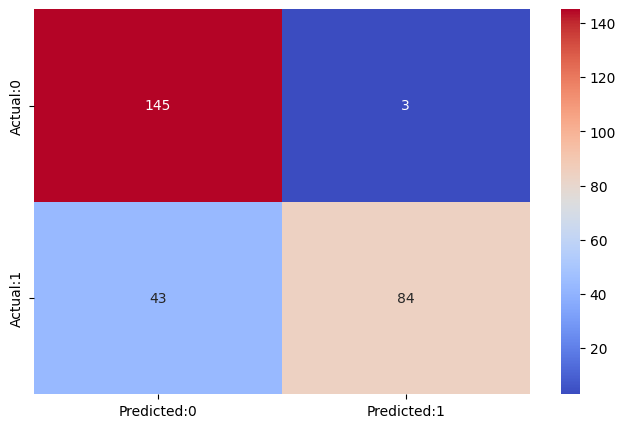

In [1]:
#Final
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation_hidden="sigmoid", activation_output="sigmoid",error_calculation="Log Loss"):
        
        if input_size<1:
            raise ValueError("Invalid amount of neuron in input layer")
        if output_size<1:
            raise ValueError("Invalid amount of neuron in output layer")
        if len(hidden_size)<1:
            raise ValueError("Hidden layer is empty")
        if min(hidden_size)<1:
            raise ValueError(f"Invalid amount of neuron in hidden layer configuration:{min(hidden_size)}")
        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(input_size, hidden_size[0])
        self.biases_hidden = np.random.rand(1, hidden_size[0])
        self.weights_layer_hidden = []
        self.biases_layer_hidden = []
        for layer in range(0,len(hidden_size)-1):
            self.weights_layer_hidden.append(np.random.rand(hidden_size[layer], hidden_size[layer+1]))
            self.biases_layer_hidden.append(np.random.rand(1, hidden_size[layer+1]))
        self.weights_hidden_output = np.random.rand(hidden_size[-1], output_size)
        self.biases_output = np.random.rand(1, output_size)

        self.configuration={}
        self.configuration["input size"]=input_size
        self.configuration["hidden size"]=hidden_size
        self.configuration["output size"]=output_size

        if error_calculation == 'Log Loss':
            self.error_calculation='Log Loss'
        elif error_calculation == 'Mean square Error':
            self.error_calculation='Mean square Error'
        elif error_calculation == 'Mean Absolute Error':
            self.error_calculation= 'Mean Absolute Error'
        else:
            raise ValueError("Invalid error calculation metrics")

        # Set activation functions
        if activation_hidden == 'sigmoid':
            self.activation_hidden = self.sigmoid
        elif activation_hidden == 'relu':
            self.activation_hidden = self.relu
        elif activation_hidden == 'tanh':
            self.activation_hidden = self.tanh
        else:
            raise ValueError("Invalid activation function")
        
        if activation_output == 'sigmoid':
            self.activation_output = self.sigmoid
        elif activation_output == 'relu':
            self.activation_output = self.relu
        elif activation_output == 'tanh':
            self.activation_output = self.tanh
        else:
            raise ValueError("Invalid activation function")

    def forward(self, X):

        # Forward pass through the network
        self.hidden_output = np.dot(X, self.weights_input_hidden) + self.biases_hidden
        self.hidden_activation = self.activation_hidden(self.hidden_output)
        self.layer_output = []
        self.layer_activation = []
        is_hidden=True
        for layer in range(0,len(self.configuration["hidden size"])-1):
            temp_layer=0
            temp_activation=0
            if is_hidden:
                temp_layer=np.dot(self.hidden_activation, self.weights_layer_hidden[layer]) + self.biases_layer_hidden[layer]
                temp_activation=self.activation_hidden(temp_layer)
            else:
                layer_hidden=np.dot(self.weights_layer_hidden[layer-1], self.weights_layer_hidden[layer]) + self.biases_layer_hidden[layer]
                layer_hidden=self.activation_hidden(layer_hidden)
                temp_layer=np.dot(layer_hidden,self.weights_layer_hidden[layer]) + self.biases_layer_hidden[layer]
                temp_activation=self.activation_hidden(temp_layer)
                is_hidden=False
            self.layer_output.append(temp_layer)
            self.layer_activation.append(temp_activation)
        self.final_output = np.dot(self.layer_activation[-1], self.weights_hidden_output) + self.biases_output
        return self.activation_output(self.final_output)
    
    # Activation functions
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def relu(self,x):
        return np.maximum(0, x)

    def tanh(self,x):
        return np.tanh(x)
    
    def load_data(self,training_inputs,training_labels,layer_generation=True):
        self.training_data=training_inputs
        self.training_labels=training_labels

        if layer_generation:
            self.configuration["hidden size"][0]=max(self.configuration["hidden size"])
            self.weights_input_hidden = np.random.rand(self.configuration["input size"], self.configuration["hidden size"][0])
            self.biases_hidden = np.random.rand(1, self.configuration["hidden size"][0])
            self.weights_layer_hidden = []
            self.biases_layer_hidden = []
            for layer in range(0,len(self.configuration["hidden size"])-1):
                self.weights_layer_hidden.append(np.random.rand(self.configuration["hidden size"][0], self.configuration["hidden size"][0]))
                self.biases_layer_hidden.append(np.random.rand(1, self.configuration["hidden size"][0]))
            self.weights_hidden_output = np.random.rand(self.configuration["hidden size"][-1], self.configuration["output size"])
            self.biases_output = np.random.rand(1, self.configuration["output size"])

            hiddensize=len(self.configuration["hidden size"])
            pivotvalue=self.configuration["hidden size"][0]
            self.configuration["hidden size"]=[pivotvalue for _ in range(hiddensize)]
            self.configuration["hidden size"].append(1)
    
    def flush_training_data(self):
        self.training_data=None
        self.training_labels=None

    def set_PSO_optimised_weights(self,optimised_weigths):

        input_size=self.configuration["input size"]
        hidden_size=self.configuration["hidden size"]
        output_size=self.configuration["output size"]
        best_weights=optimised_weigths

        num_weights_input_hidden = input_size * hidden_size[0]
        num_biases_hidden = hidden_size[0]
        best_weights_input_hidden = np.reshape(best_weights[:num_weights_input_hidden], (input_size, hidden_size[0]))
        best_biases_hidden = np.reshape(best_weights[num_weights_input_hidden:num_weights_input_hidden + num_biases_hidden],
                                        (1, hidden_size[0]))
        num_weights_layer=[]
        num_biases_layer=[]
        best_weights_layer=[]
        best_biases_layer=[]
        for layer in range(0,len(hidden_size)-1):
            temp_weight_layer=hidden_size[layer]*hidden_size[layer+1]
            num_weights_layer.append(temp_weight_layer)
            num_biases_layer.append(hidden_size[layer+1])
            if layer == 0:
                layer_weight=num_weights_input_hidden + num_biases_hidden
                layer_weight_with_temp=num_weights_input_hidden + num_biases_hidden + temp_weight_layer
                best_weights_layer.append(np.reshape(best_weights[layer_weight:layer_weight_with_temp],(hidden_size[layer], hidden_size[layer+1])))
                best_biases_layer.append(np.reshape(best_weights[layer_weight_with_temp:layer_weight_with_temp+hidden_size[layer+1]],(1, hidden_size[layer+1])))
            else:
                layer_weight=num_weights_layer[layer] + num_biases_layer[layer]
                layer_weight_with_temp=num_weights_layer[layer] + num_biases_layer[layer] + temp_weight_layer
                best_weights_layer.append(np.reshape(best_weights[layer_weight:layer_weight_with_temp],(hidden_size[layer], hidden_size[layer+1])))
                best_biases_layer.append(np.reshape(best_weights[layer_weight_with_temp:layer_weight_with_temp+hidden_size[layer+1]],(1, hidden_size[layer+1])))
        num_weights_hidden_output = hidden_size[-1] * output_size

        layer_weight=num_weights_layer[-1] + num_biases_layer[-1]
        layer_weight_with_temp=num_weights_layer[-1] + num_biases_layer[-1] + num_weights_hidden_output
        best_weights_hidden_output = np.reshape(best_weights[layer_weight:layer_weight_with_temp],(hidden_size[-1], output_size))
        best_biases_output = np.reshape(best_weights[layer_weight_with_temp:layer_weight_with_temp+output_size],(1, output_size))

        self.weights_input_hidden = best_weights_input_hidden
        self.biases_hidden = best_biases_hidden
        self.weights_layer_hidden = best_weights_layer
        self.biases_layer_hidden = best_biases_layer
        self.weights_hidden_output = best_weights_hidden_output
        self.biases_output = best_biases_output

    def predict(self,value_list):
        return self.forward(value_list)
    
    #Evalution metrics
    def evaluation_metrics(self,target_list,prediction_list):
        true_positive = 0
        true_negative = 0
        false_positive = 0
        false_negative = 0
        for l1,l2 in zip(target_list, prediction_list):
            if (l1 == 1 and  np.round(l2) == 1):
                true_positive = true_positive + 1
            elif (l1 == 0 and np.round(l2) == 0):
                true_negative = true_negative + 1
            elif (l1 == 1 and np.round(l2) == 0):
                false_negative = false_negative + 1
            elif (l1 == 0 and np.round(l2) == 1):
                false_positive = false_positive + 1
        result={}

        binary_predictions = np.round(prediction_list)
        correct_predictions = np.sum(binary_predictions == target_list)
        total_predictions = len(target_list)
        
        result["Accuracy"] = correct_predictions / total_predictions
        result["Mean Square Error"] = np.mean(np.square(target_list - predictions))
        result["Mean Absolute Error"] = np.mean(np.abs(target_list - prediction_list))
        LL = -np.mean(target_list * np.log(np.clip(prediction_list, 1e-15, 1 - 1e-15)) + (1 - target_list) * np.log(1 - np.clip(prediction_list, 1e-15, 1 - 1e-15)))
        result["Log Loss"] = LL
        
        result["True Positives"] = true_positive
        result["True Negatives"] = true_negative
        result["False Positives"] = false_positive
        result["False Negatives"] = false_negative

        precision=0
        recall=0
        if(true_positive + false_positive)!=0:
            precision = true_positive/(true_positive + false_positive)
            recall = true_positive/(true_positive + false_negative)
        result["Precision"] = precision
        result["Recall"] = recall
        result["Specificity"] = 0
        if (true_negative + false_positive)!=0:
            result["Specificity"] = true_negative/(true_negative + false_positive)
        result["Negative Predictive Value"] = 0
        if (true_negative + false_negative)!=0:
            result["Negative Predictive Value"] = true_negative/(true_negative + false_negative)
        result["F-Measure"] = 0
        if (precision + recall)!=0:
            result["F-Measure"] = (2* precision * recall)/(precision + recall) #F1 score
        return result

# Define the PSO algorithm
def particle_swarm_optimization(objective_function,p_neural_network, num_particles, max_iter, inertia_weight=0.5, cognitive_weight=2.0,social_weight=2.0):
    # Initialize particles' positions and velocities
    input_size=p_neural_network.configuration["input size"]
    hidden_size=p_neural_network.configuration["hidden size"]
    output_size=p_neural_network.configuration["output size"]
    num_dimensions = (input_size * hidden_size[0]) + hidden_size[0]
    for layer in range(0,len(hidden_size)-1):
        num_dimensions+=(hidden_size[layer] * hidden_size[layer+1]) + hidden_size[layer+1]
    num_dimensions+=(hidden_size[-1] * output_size) + output_size
    particles_position = np.random.rand(num_particles, num_dimensions)
    particles_velocity = np.random.rand(num_particles, num_dimensions)

    # Initialize personal best positions and fitness values
    personal_best_positions = particles_position.copy()
    personal_best_fitness = np.full(num_particles, np.inf)

    # Initialize global best position and fitness value
    global_best_position = np.zeros(num_dimensions)
    global_best_fitness = np.inf

    for iteration in range(max_iter):
        for i in range(num_particles):
            # Evaluate fitness
            fitness = objective_function(particles_position[i],p_neural_network)

            # Update personal best
            if fitness < personal_best_fitness[i]:
                personal_best_fitness[i] = fitness
                personal_best_positions[i] = particles_position[i]

            # Update global best
            if fitness < global_best_fitness:
                global_best_fitness = fitness
                global_best_position = particles_position[i]

            # Update velocity and position
            inertia_weight = inertia_weight
            cognitive_weight = cognitive_weight
            social_weight = social_weight

            r1, r2 = np.random.rand(), np.random.rand()
            cognitive_component = cognitive_weight * r1 * (personal_best_positions[i] - particles_position[i])
            social_component = social_weight * r2 * (global_best_position - particles_position[i])

            particles_velocity[i] = inertia_weight * particles_velocity[i] + cognitive_component + social_component
            particles_position[i] = particles_position[i] + particles_velocity[i]

    p_neural_network.flush_training_data()
    return global_best_position

# Define the objective function to minimize error
def fitness_function(weights,p_neural_network):
    # Reshape weights for the neural network
    input_size = p_neural_network.configuration["input size"]
    hidden_size = p_neural_network.configuration["hidden size"]
    output_size = p_neural_network.configuration["output size"]

    num_weights_input_hidden = input_size * hidden_size[0]
    num_biases_hidden = hidden_size[0]
    num_weights_hidden_output = hidden_size[-1] * output_size
    num_biases_output = output_size

    weights_input_hidden = np.reshape(weights[:num_weights_input_hidden], (input_size, hidden_size[0]))
    biases_hidden = np.reshape(weights[num_weights_input_hidden:num_weights_input_hidden + num_biases_hidden],
                                (1, hidden_size[0]))

    num_weights_layer=[]
    num_biases_layer=[]
    weights_layer=[]
    biases_layer=[]
    for layer in range(0,len(hidden_size)-1):
        temp_weight_layer=hidden_size[layer]*hidden_size[layer+1]
        num_weights_layer.append(temp_weight_layer)
        num_biases_layer.append(hidden_size[layer+1])
        if layer == 0:
            layer_weight=num_weights_input_hidden + num_biases_hidden
            layer_weight_with_temp=num_weights_input_hidden + num_biases_hidden + temp_weight_layer

            weights_layer.append(np.reshape(weights[layer_weight:layer_weight_with_temp],(hidden_size[layer], hidden_size[layer+1])))
            biases_layer.append(np.reshape(weights[layer_weight_with_temp:layer_weight_with_temp+hidden_size[layer+1]],(1,hidden_size[layer+1])))
        else:
            layer_weight=num_weights_layer[layer] + num_biases_layer[layer]
            layer_weight_with_temp=num_weights_layer[layer] + num_biases_layer[layer] + temp_weight_layer
            weights_layer.append(np.reshape(weights[layer_weight:layer_weight_with_temp],(hidden_size[layer], hidden_size[layer+1])))
            biases_layer.append(np.reshape(weights[layer_weight_with_temp:layer_weight_with_temp+hidden_size[layer+1]],(1,hidden_size[layer+1])))

    layer_weight=num_weights_layer[-1] + num_biases_layer[-1]
    layer_weight_with_output=num_weights_layer[-1] + num_biases_layer[-1] + num_weights_hidden_output
    weights_hidden_output = np.reshape(weights[layer_weight:layer_weight_with_output],(hidden_size[-1], output_size))
    biases_output = np.reshape(weights[layer_weight_with_output:layer_weight_with_output+output_size],
                                (1, output_size))

    # Set the weights and biases in the neural network
    p_neural_network.weights_input_hidden = weights_input_hidden
    p_neural_network.biases_hidden = biases_hidden
    p_neural_network.weights_layer_hidden = weights_layer
    p_neural_network.biases_layer_hidden = biases_layer
    p_neural_network.weights_hidden_output = weights_hidden_output
    p_neural_network.biases_output = biases_output
    
    # Forward pass through the neural network
    predictions = p_neural_network.forward(p_neural_network.training_data)
    labels=p_neural_network.training_labels

    # Calculate error
    error=np.mean(np.square(predictions - labels))
    if p_neural_network.error_calculation == 'Log Loss':
        error = -np.mean(labels * np.log(np.clip(predictions, 1e-15, 1 - 1e-15)) + (1 - labels) * np.log(1 - np.clip(predictions, 1e-15, 1 - 1e-15)))
    elif p_neural_network.error_calculation == 'Mean square Error':
        error = np.mean(np.square(predictions - labels))
    elif p_neural_network.error_calculation == 'Mean Absolute Error':
        error = np.mean(np.abs(labels - predictions))

    return error

# Load data from CSV file
data = pd.read_csv('C:/Users/akars/Downloads/Bank_Data 1.csv')

# Assuming the last column is the target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the input, hidden, and output sizes
input_size = X_train.shape[1]
hidden_size = [5,4,3,9]
output_size = 1

# Create an instance of the neural network with ReLU activation for hidden layer and error as Log Loss
neural_network = NeuralNetwork(input_size, hidden_size, output_size, activation_hidden="relu",error_calculation="Log Loss")
neural_network.load_data(X_train,y_train)

# Set PSO parameters
num_particles = 15
max_iter = 100

# Run PSO to optimize neural network weights

best_weights = particle_swarm_optimization(fitness_function,neural_network, num_particles, max_iter)

# Set PSO optimised weights in the neural network

neural_network.set_PSO_optimised_weights(best_weights)

predictions = neural_network.predict(X_test)

evaluation=neural_network.evaluation_metrics(y_test,predictions)
print("Optimized Neural Network Predictions:")
print(evaluation)

cm=[[evaluation["True Negatives"],evaluation["False Positives"]],[evaluation["False Negatives"],evaluation["True Positives"]]]
print(cm)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="coolwarm")


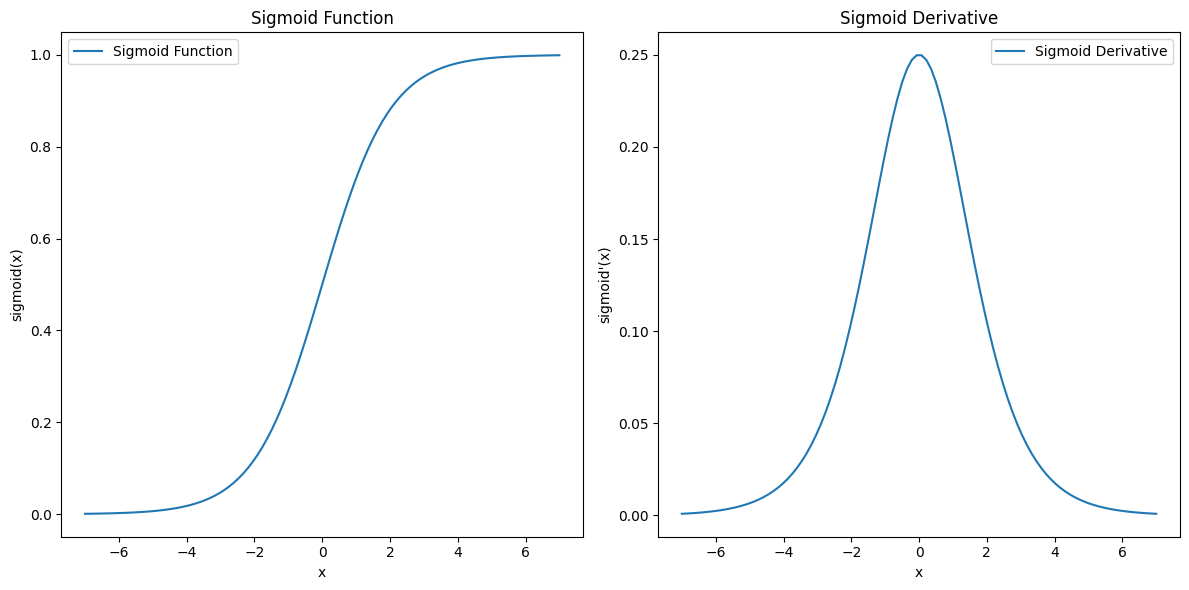

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

x_values = np.linspace(-7, 7, 100)
y_sigmoid = sigmoid(x_values)
y_derivative = sigmoid_derivative(x_values)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_values, y_sigmoid, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_values, y_derivative, label='Sigmoid Derivative')
plt.title('Sigmoid Derivative')
plt.xlabel('x')
plt.ylabel('sigmoid\'(x)')
plt.legend()

plt.tight_layout()
plt.show()